<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [1]:
!pip install pooch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


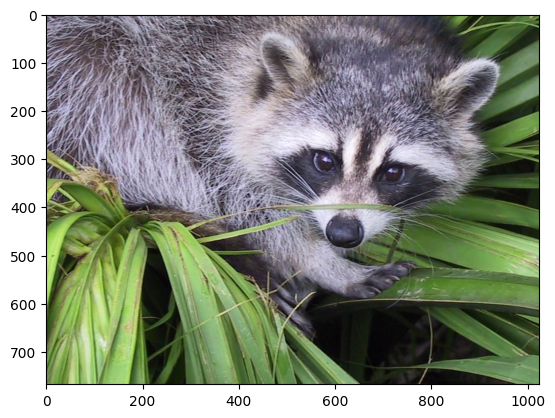

In [2]:
import matplotlib.pyplot as plt
from scipy import datasets
import numpy as np

# Cargar imagen en color
A = datasets.face(gray=False)

# Visualización adaptable
if A.ndim == 2:
    plt.imshow(A, cmap=plt.cm.gray)
else:
    plt.imshow(A)
plt.show()

In [3]:
A

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [4]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [5]:
import numpy as np

def sse_score(X, X_hat):
    if X.ndim == 2:  # Gris
        return np.sum((X - X_hat) ** 2)
    else:  # Color (H x W x 3)
        total = 0
        for c in range(X.shape[2]):
            total += np.sum((X[:,:,c] - X_hat[:,:,c]) ** 2)
        return total

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [6]:
import numpy as np
from scipy.linalg import svd

def svd_fun(X):
    # TODO Define la función
    U, s, Vt = svd(A, full_matrices=False)
    S = np.diag(s)
    return U, S, Vt # S es una matriz diagonal

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svd_fun(X)  
print(U)
print(S)
print(Vt)

[[[-0.03416113 -0.01985687  0.00984392]
  [-0.03894481 -0.01935864  0.01137248]
  [-0.04335421 -0.02142175  0.01725152]
  ...
  [-0.02988013  0.06825616 -0.07305466]
  [-0.03269485  0.07119317 -0.08631443]
  [-0.03494584  0.0714274  -0.08559891]]

 [[-0.02549439 -0.01950289  0.01431655]
  [-0.03141656 -0.01885111  0.01613815]
  [-0.03715382 -0.02194807  0.01979525]
  ...
  [-0.02947161  0.07103077 -0.07869237]
  [-0.0339837   0.07152747 -0.07730512]
  [-0.03736778  0.0719     -0.07626471]]

 [[-0.02063156 -0.0201183   0.0133693 ]
  [-0.02645462 -0.01942051  0.01522578]
  [-0.03227745 -0.01872166  0.01707766]
  ...
  [-0.02897108  0.07324366 -0.07345407]
  [-0.03340753  0.07377604 -0.07204291]
  [-0.03645759  0.07414203 -0.07107272]]

 ...

 [[-0.02878781  0.02947916 -0.01351293]
  [-0.03042504  0.03700232 -0.00182851]
  [-0.03445853  0.04372377  0.00110718]
  ...
  [-0.0406306   0.00218903 -0.02614415]
  [-0.04031826  0.00118092 -0.02617229]
  [-0.04037008 -0.00286707 -0.02600186]]

 [

### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [7]:
def reconstruction(U, S, Vt):
    # TODO Define la función
    return U @ S @ Vt
    # o bien return np.dot(U, np.dot(S, Vt))

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [8]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [9]:
def image_compression(A, n_comp):
    if A.ndim == 2:  # Gris
        U, S, Vt = np.linalg.svd(A, full_matrices=False)
        A_hat = (U[:, :n_comp] @ np.diag(S[:n_comp]) @ Vt[:n_comp, :])
        sse = np.sum((A - A_hat) ** 2)
        A_hat = np.clip(A_hat, 0, 255).astype(np.uint8)
        return A_hat, sse
    else:  # Color
        A_hat = np.zeros_like(A, dtype=float)
        sse_total = 0
        for c in range(A.shape[2]):
            U, S, Vt = np.linalg.svd(A[:, :, c], full_matrices=False)
            canal_hat = (U[:, :n_comp] @ np.diag(S[:n_comp]) @ Vt[:n_comp, :])
            A_hat[:, :, c] = canal_hat
            sse_total += np.sum((A[:, :, c] - canal_hat) ** 2)
        A_hat = np.clip(A_hat, 0, 255).astype(np.uint8)
        return A_hat, sse_total

racoon = datasets.face(gray=False)
racoon_hat, sse = image_compression(racoon, n_comp=50)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

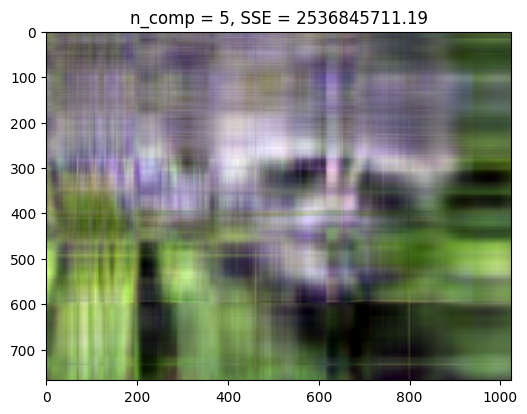

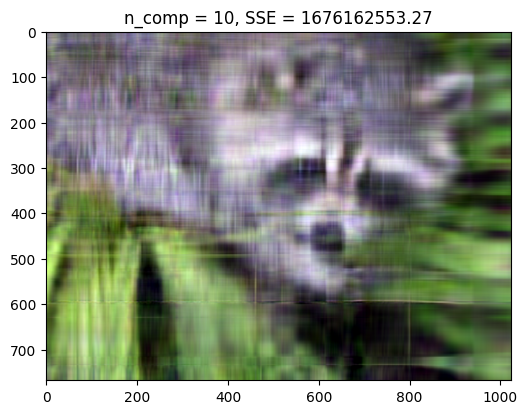

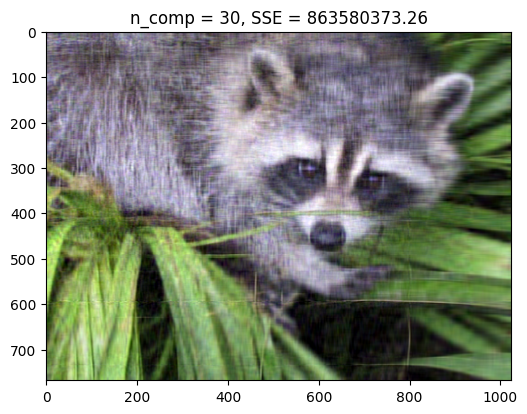

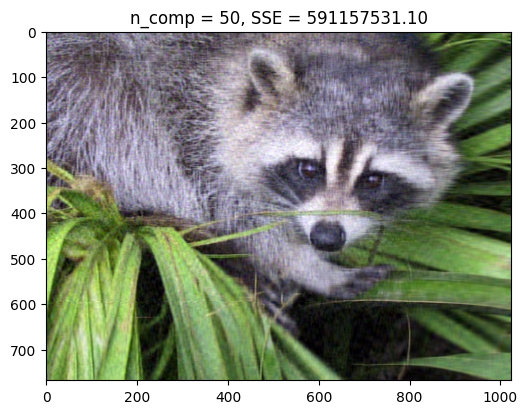

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.datasets import face  
# Asumimos que la función `image_compression` ya está definida

# Cargar una imagen de ejemplo (una cara en color)
racoon = face(gray=False)  # Usamos la imagen en color

# Elegir diferentes valores para n_comp y mostrar las imágenes comprimidas
n_comps = [5, 10, 30, 50]  # Ejemplos de diferentes valores de n_comp

for n_comp in n_comps:
    # Comprimir la imagen con el número de componentes especificado
    racoon_hat, sse = image_compression(racoon, n_comp)
    
    # Crear la figura
    plt.figure(figsize=(6, 6))
    
    # Mostrar la imagen comprimida en color
    plt.imshow(racoon_hat)
    
    # Añadir el título con el número de componentes y el error de reconstrucción
    plt.title(f"n_comp = {n_comp}, SSE = {sse:.2f}")
    
    # Mostrar la gráfica
    plt.show()
